<a href="https://colab.research.google.com/github/Karlamch/karlaMCH/blob/main/eii_u2_03_22150453.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
import pandas as pd
import numpy as np

df =pd.read_csv("https://raw.githubusercontent.com/Karlamch/karlaMCH/refs/heads/main/Churn_Modelling.csv")
df.dropna(inplace = True)
df

df.drop(columns = ["RowNumber", "CustomerId", "Surname"], inplace = True)
df


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
5,645,Spain,Male,44.0,8,113755.78,2,1.0,0.0,149756.71,1
...,...,...,...,...,...,...,...,...,...,...,...
9997,709,France,Female,36.0,7,0.00,1,0.0,1.0,42085.58,1
9998,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
9999,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10000,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0


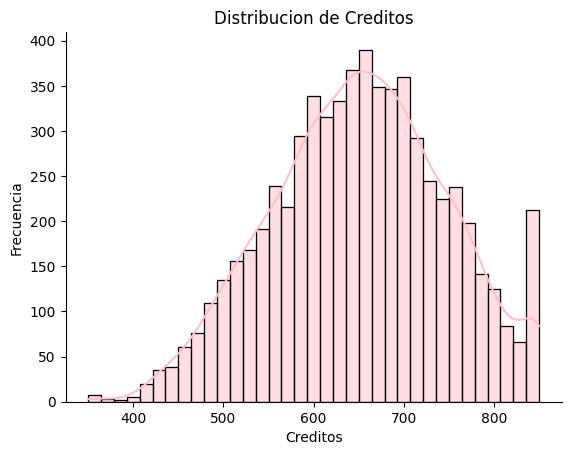

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['CreditScore'], kde = True, color = 'pink')
plt.xlabel('Creditos')
plt.ylabel('Frecuencia')
plt.title('Distribucion de Creditos')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

#en este caso no es atipico

In [67]:
df["Geography"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [68]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo=smf.ols("EstimatedSalary ~ C(Geography)",data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo)
tabla_anova

#No se rechaza la hipotesis nula, no hay diferencia de grupos

,df,sum_sq,mean_sq,F,PR(>F)
C(Geography),2.0,3.782055e+09,1.891028e+09,0.571689,0.56459
Residual,9995.0,3.306138e+13,3.307792e+09,NaN,NaN


In [69]:
df.drop(columns = ["Geography"], inplace = True)
df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,608,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,502,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,699,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
5,645,Male,44.0,8,113755.78,2,1.0,0.0,149756.71,1
...,...,...,...,...,...,...,...,...,...,...
9997,709,Female,36.0,7,0.00,1,0.0,1.0,42085.58,1
9998,772,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
9999,772,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10000,792,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0


In [70]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo=smf.ols("EstimatedSalary ~ C(Gender)",data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo)
tabla_anova

#No rechazamos las hipotesis nula, no hay diferencia de grupos

,df,sum_sq,mean_sq,F,PR(>F)
C(Gender),1.0,2.021718e+09,2.021718e+09,0.611227,0.434345
Residual,9996.0,3.306314e+13,3.307637e+09,NaN,NaN


In [71]:
df.drop(columns = ["Gender"], inplace = True)
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,608,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,502,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,699,39.0,1,0.00,2,0.0,0.0,93826.63,0
5,645,44.0,8,113755.78,2,1.0,0.0,149756.71,1
...,...,...,...,...,...,...,...,...,...
9997,709,36.0,7,0.00,1,0.0,1.0,42085.58,1
9998,772,42.0,3,75075.31,2,1.0,0.0,92888.52,1
9999,772,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10000,792,28.0,4,130142.79,1,1.0,0.0,38190.78,0


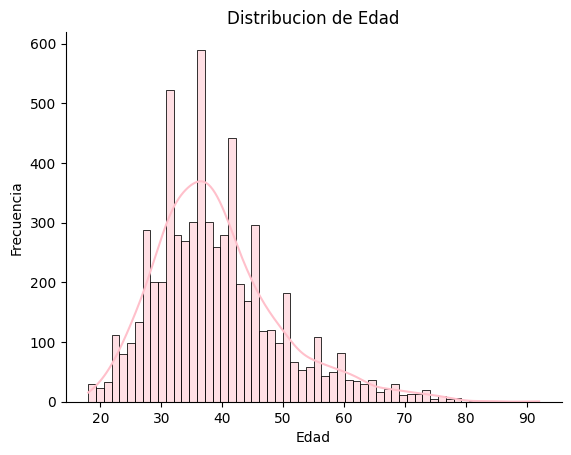

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Age'], kde = True, color = 'pink')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Distribucion de Edad')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

#No son atipicos

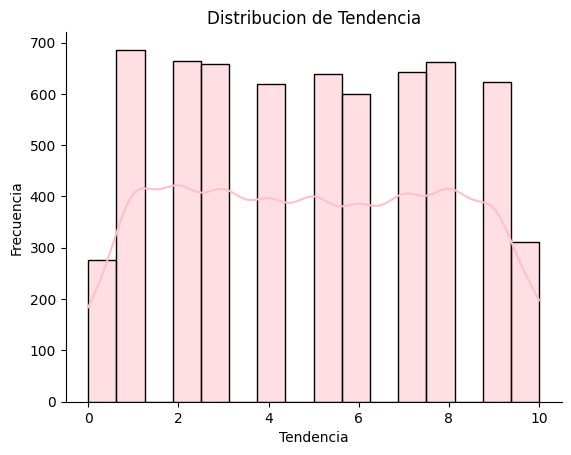

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Tenure'], kde = True, color = 'pink')
plt.xlabel('Tendencia')
plt.ylabel('Frecuencia')
plt.title('Distribucion de Tendencia')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

#No tiene atipicos

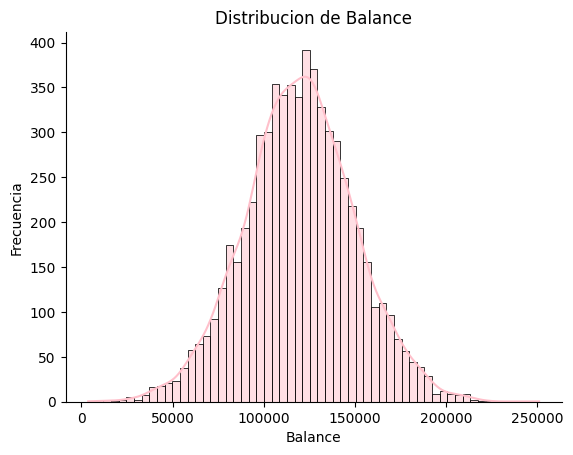

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Balance'], kde = True, color = 'pink')
plt.xlabel('Balance')
plt.ylabel('Frecuencia')
plt.title('Distribucion de Balance')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

#Si es atipico


In [75]:
df = df.loc[df["Balance"]!=0.0,:]
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,608,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,502,42.0,8,159660.80,3,1.0,0.0,113931.57,1
5,645,44.0,8,113755.78,2,1.0,0.0,149756.71,1
7,376,29.0,4,115046.74,4,1.0,0.0,119346.88,1
10,528,31.0,6,102016.72,2,0.0,0.0,80181.12,0
...,...,...,...,...,...,...,...,...,...
9996,516,35.0,10,57369.61,1,1.0,1.0,101699.77,0
9998,772,42.0,3,75075.31,2,1.0,0.0,92888.52,1
9999,772,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10000,792,28.0,4,130142.79,1,1.0,0.0,38190.78,0


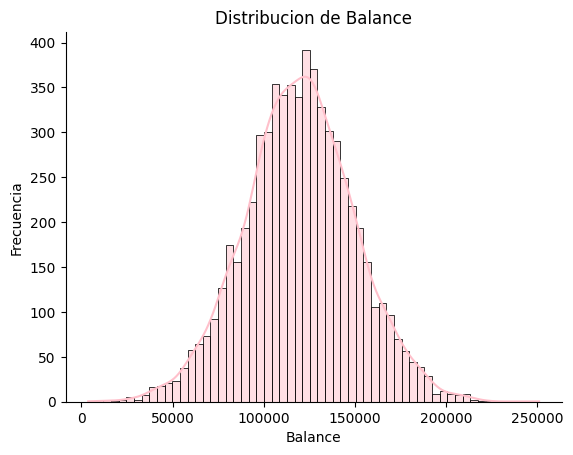

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Balance'], kde = True, color = 'pink')
plt.xlabel('Balance')
plt.ylabel('Frecuencia')
plt.title('Distribucion de Balance')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

In [77]:
df["NumOfProducts"].unique()

array([1, 3, 2, 4])

In [78]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo=smf.ols("EstimatedSalary ~ C(NumOfProducts)",data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo)
tabla_anova

#Se acepta la hipotesis nula

,df,sum_sq,mean_sq,F,PR(>F)
C(NumOfProducts),3.0,1.666167e+10,5.553889e+09,1.68695,0.16751
Residual,6378.0,2.099808e+13,3.292267e+09,NaN,NaN


In [79]:
df["HasCrCard"].unique()

array([0., 1.])

In [80]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo=smf.ols("EstimatedSalary ~ C(HasCrCard)",data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo)
tabla_anova
#Estos datos no aportan nada

,df,sum_sq,mean_sq,F,PR(>F)
C(HasCrCard),1.0,4.315124e+08,4.315124e+08,0.131008,0.717401
Residual,6380.0,2.101431e+13,3.293778e+09,NaN,NaN


In [81]:
df.drop(columns = ["HasCrCard"], inplace = True)
df

<ipython-input-81-05a1d017a22e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns = ["HasCrCard"], inplace = True)


,CreditScore,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited
1,608,41.0,1,83807.86,1,1.0,112542.58,0
2,502,42.0,8,159660.80,3,0.0,113931.57,1
5,645,44.0,8,113755.78,2,0.0,149756.71,1
7,376,29.0,4,115046.74,4,0.0,119346.88,1
10,528,31.0,6,102016.72,2,0.0,80181.12,0
...,...,...,...,...,...,...,...,...
9996,516,35.0,10,57369.61,1,1.0,101699.77,0
9998,772,42.0,3,75075.31,2,0.0,92888.52,1
9999,772,42.0,3,75075.31,2,0.0,92888.52,1
10000,792,28.0,4,130142.79,1,0.0,38190.78,0


**# IsActiveMember**

In [82]:
df["IsActiveMember"].unique()

array([1., 0.])

In [83]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo=smf.ols("EstimatedSalary ~ C(IsActiveMember)",data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo)
tabla_anova

,df,sum_sq,mean_sq,F,PR(>F)
C(IsActiveMember),1.0,3.677991e+09,3.677991e+09,1.116821,0.290644
Residual,6380.0,2.101106e+13,3.293270e+09,NaN,NaN


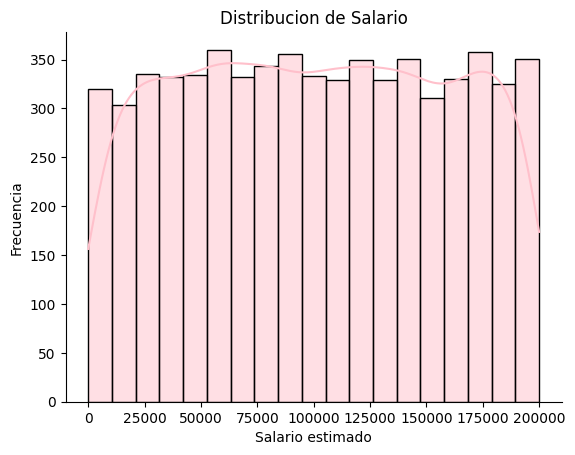

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['EstimatedSalary'], kde = True, color = 'pink')
plt.xlabel('Salario estimado')
plt.ylabel('Frecuencia')
plt.title('Distribucion de Salario')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

**Exited**

In [85]:
df["Exited"].unique()

array([0, 1])

In [86]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo=smf.ols("EstimatedSalary ~ C(Exited)",data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo)
tabla_anova

#Los datos no aportan

,df,sum_sq,mean_sq,F,PR(>F)
C(Exited),1.0,8.272243e+08,8.272243e+08,0.251152,0.616282
Residual,6380.0,2.101391e+13,3.293716e+09,NaN,NaN


In [87]:
df.drop(columns = ["Exited"], inplace = True)
df

<ipython-input-87-bac1af30eeba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns = ["Exited"], inplace = True)


,CreditScore,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary
1,608,41.0,1,83807.86,1,1.0,112542.58
2,502,42.0,8,159660.80,3,0.0,113931.57
5,645,44.0,8,113755.78,2,0.0,149756.71
7,376,29.0,4,115046.74,4,0.0,119346.88
10,528,31.0,6,102016.72,2,0.0,80181.12
...,...,...,...,...,...,...,...
9996,516,35.0,10,57369.61,1,1.0,101699.77
9998,772,42.0,3,75075.31,2,0.0,92888.52
9999,772,42.0,3,75075.31,2,0.0,92888.52
10000,792,28.0,4,130142.79,1,0.0,38190.78


Text(0.5, 1.0, 'Mapa de Calor de la Matriz de Correlación')

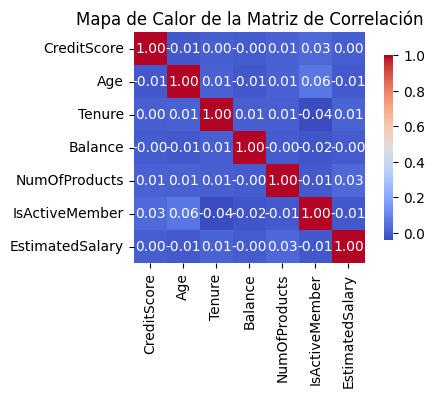

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()
plt.figure(figsize=(5, 3))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, cbar_kws={"shrink": .8})
plt.title('Mapa de Calor de la Matriz de Correlación')

Coeficiente de correlacion: -0.0012



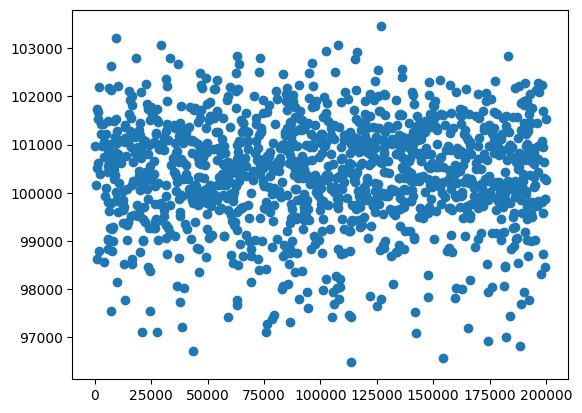

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import statsmodels.api as sm
import matplotlib.pyplot as plt


X = df[['CreditScore',	'Age',	'Tenure',	'Balance']]
Y = df["EstimatedSalary"]

# Datos de entrenamiento y datos de prueba

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

X_train_constante = sm.add_constant(X_train)
X_test_constante = sm.add_constant(X_test)

modelo = sm.OLS(Y_train, X_train_constante).fit()


Yc = modelo.predict(X_test_constante)

plt.scatter(Y_test, Yc)

r2 = r2_score(Y_test, Yc)
print(f'Coeficiente de correlacion: {r2: 0.4f}\n')

Un coeficiente de correlacion de -0.0012 indica que no hay una relacion

*   Elemento de la lista
*   Elemento de la lista

lineal aparentemente entre las variables, es decir, que no hay correlacion.

In [90]:
b0, b1, b2, b3, b4 = modelo.params

Fun = lambda x1, x2, x3, x4: b0 + b1 * x1 + b2 * x2 + b3 * x3 + b4 * x4

# El salario estimado se puede calcular usando variables como el puntaje de crédito, edad, antigüedad laboral y saldo financiero , ya que reflejan estabilidad, experiencia y capacidad de pago.
# Estos datos permiten predecir ingresos mediante modelos estadísticos o de aprendizaje automático.

Fun(432, 60, 2, 120000)

97992.76900028627

In [91]:
from statsmodels.formula.api import ols

moedo_2 = ols(formula = 'EstimatedSalary ~ CreditScore + Age + Tenure + Balance', data = df).fit()
tabla_anova = sm.stats.anova_lm(moedo_2, typ = 2)
tabla_anova

,sum_sq,df,F,PR(>F)
CreditScore,8.826550e+05,1.0,0.000268,0.986941
Age,1.548042e+09,1.0,0.469869,0.493072
Tenure,3.339433e+09,1.0,1.013600,0.314080
Balance,8.135894e+07,1.0,0.024694,0.875136
Residual,2.100982e+13,6377.0,NaN,NaN


sum_sq indica la variabilidad explicada por cada cariable en la regresion.

La suma de cuadrados residuales es mucho mayor que la de las variables predictoras, lo que indica que una gran parte de la variabilidad en EstimatedSalary no está explicada por las variables incluidas en el modelo.

df (Grados de Libertad): Representa cuántos valores pueden variar libremente en el cálculo.

Cada variable tiene 1 grado de libertad, porque se evalúan de manera individual.

Los residuos tienen 6377 grados de libertad.

F (Estadístico F): Indica la razón de variación explicada sobre la variación no explicada.

Los valores son bastante bajos (por ejemplo, CreditScore tiene 0.000268 y Age 0.469869).

Esto sugiere que ninguna de las variables tiene un efecto fuerte sobre el Salario Estimado .

PR(>F) (Valor p): Indica la significancia estadística del efecto de cada variable.

Valores altos (todos por encima de 0.05, como CreditScore con 0.986941 y Age con 0.493072) sugieren que ninguna de estas variables es estadísticamente significativa en la predicción de EstimatedSalary.